In [ ]:
#web scrape
import requests
from bs4 import BeautifulSoup



def get_video_links(archive_url):

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links, number):
	directory_path = f"./audio/{number}/"

	for link in video_links:
		file_name = f"{directory_path}{link.split('/')[-1]}"

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return

for i in range(10):
	archive_url = f"https://clarksonmsda.org/ml/audio2/data/numbers/{i}/"

	video_links = get_video_links(archive_url)

	download_video_series(video_links, i)
	

	

  

In [1]:
import IPython.display as ipd
ipd.Audio('audio/1/american_f_Alexa_20230406110150.wav')

In [5]:
import os

In [ ]:
# Remove files
for i in range(10):
    file_path = f"./audio/{i}/.DS_Store"

    # Check if the file exists
    if os.path.exists(file_path):
        # Remove the file
        os.remove(file_path)
        print(f"File {file_path} removed successfully")
    else:
        print(f"File {file_path} not found")


In [3]:
import sounddevice as sd
import soundfile as sf

In [ ]:
# # Remove bad audio files

for folder in range(10):
    audio_list = os.listdir(f"./audio/{folder}/")

    for i,file_name in enumerate(audio_list):
        file_path =f"./audio/{folder}/{file_name}"


        # Load the audio file using SoundFile
        data, sample_rate = sf.read(file_path, dtype='float32')
        
        # Play the audio using SoundDevice
        sd.play(data, sample_rate, blocking=True)
        # sd.wait()

         # Prompt the user to delete the file
        delete_file = True
        while delete_file:
            answer = input(f"Do you want to delete {file_name}? (y/n) ")
            if answer == 'y':
                # Delete the audio file
                os.remove(file_path)
                print(f"File {file_name} removed successfully.")
                delete_file = False
            elif answer == 'n':
                print(f"File {file_name} not removed.")
                delete_file = False
    


    

In [1]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

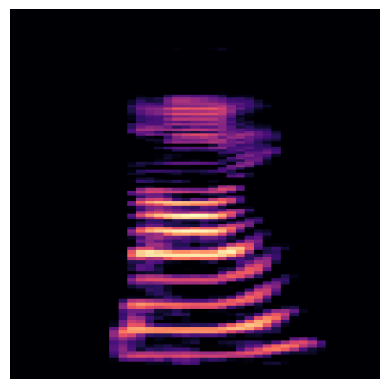

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa.display

y, sr = librosa.load('../audio/9/venezuelan_f_Glories_20230406111759.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Plot and save the spectrogram without axis labels or titles
plt.figure(figsize=(5, 5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.axis('off')
plt.tight_layout()
plt.savefig('spectrogram.png', bbox_inches='tight', pad_inches=0)
plt.close()

# Load the saved image and display it
img = mpimg.imread('spectrogram.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [7]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
import sys
from pathlib import Path

In [ ]:
# generating spectrograms of the data
# Saving them into dictionaries for later analysis part

spectrograms_dictionary = {}
waveforms_dictionary = {}
mel_spectrogram_dictionary= {}




path = "../audio/"

for j in range(10):
    spectrograms = []
    waveforms = []
    mel_spectrogram = []

    mel_png_dir = f'../mel_spectro/{j}/'
    dir_list = os.listdir(f"{path}{j}/")
    
    
    for i,file_name in enumerate(dir_list):

        y, sr = librosa.load(f"{path}{j}/{file_name}")
        waveforms.append(y)

        spectrogram = librosa.stft(y)
        spectrograms.append(spectrogram)

        S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
        s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
        mel_spectrogram.append(s_db_mel)
        
        plt.figure(figsize=(14,5))
        librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear')

        print(s_db_mel.shape)

        # path to save mel_spectro images
        if not os.path.exists(mel_png_dir):
            Path(mel_png_dir).mkdir(exist_ok=True,parents=True)
        png_destination=os.path.join(mel_png_dir,f"{file_name[:-3]}png")

        plt.axis('off')
        plt.tight_layout()
        plt.savefig(png_destination, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load the saved image and display it
        img = mpimg.imread(png_destination)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    
    spectrograms_dictionary[j] = spectrograms
    waveforms_dictionary[j] = waveforms
    mel_spectrogram_dictionary[j]= mel_spectrogram



In [33]:
#setup the same dimension size to the all croped mel spectrograms
mel_spectrogram_dictionary_fixed_dim= {}
#maximum number of columns among all arrays
max_cols = max([arr.shape[1] for num, mel_spectrogram in mel_spectrogram_dictionary.items() for arr in mel_spectrogram])

# resize each array to have the same number of columns
for num, mel_spectrogram in mel_spectrogram_dictionary.items():
    dir_list = os.listdir(f"{path}{num}/")
    mel_fix_png_dir = f'../mel_spectro_fix_dim/{num}/'

    for i in range(len(mel_spectrogram)):
        new_arr = np.full((mel_spectrogram[i].shape[0], max_cols), mel_spectrogram[i].min())
        new_arr[:,:mel_spectrogram[i].shape[1]]= mel_spectrogram[i]
        mel_spectrogram[i] = new_arr
        print(new_arr.shape)

        plt.figure(figsize=(14,5))
        librosa.display.specshow(new_arr,sr=sr,x_axis='s',y_axis='linear')

        if not os.path.exists(mel_fix_png_dir):
            Path(mel_fix_png_dir).mkdir(exist_ok=True,parents=True)
        png_destination=os.path.join(mel_fix_png_dir,f"{dir_list[i][:-3]}png")

        plt.axis('off')
        plt.tight_layout()
        plt.savefig(png_destination, dpi =10,  bbox_inches='tight', pad_inches=0)
        plt.close()


            
        
    mel_spectrogram_dictionary_fixed_dim.update({num : mel_spectrogram})

(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 41)


In [26]:
import pickle
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
import numpy as np


In [28]:
# Writing all the data to pickle files
import pickle


# file_names = ['waveforms', 'spectrograms', 'mel_spectrograms']
# data_dictionaries = [waveforms_dictionary, spectrograms_dictionary, mel_spectrogram_dictionary]
file_names = ['mel_spectrogram_fixed_dim']
data_dictionaries = [mel_spectrogram_dictionary_fixed_dim]
for i in range(len(file_names)):

    # Open a file for writing
    with open(f"../data/{file_names[i]}.pickle", "wb") as f:
        # Write the dictionary data to the file as Pickle
        pickle.dump(data_dictionaries[i], f)

    print("Dictionary data written to file successfully")


Dictionary data written to file successfully
